# Generate Dataset

## Noise Added Speech Dataset

SNR = 10log(RMS_Signal^2/RMS_Noise^2)

=> RMS_Noise = sqrt(RMS_Signal^2 / 10^(SNR/10))

In [1]:
# Import
import librosa
import numpy as np
from math import sqrt
import IPython.display as ipd
import matplotlib.pyplot as plt

print('Librosa {}'.format(librosa.__version__))

# Sample Files
female_speech_file = "Audio Samples/Female_Speech.WAV"
male_speech_file = "Audio Samples/Male_Speech.WAV"
kindergarden_noise_file = "Audio Samples/Kindergarten_Noise.wav"
trainstation_noise_file = "Audio Samples/TrainStation_Noise.wav"

def add_noise_to_speech(speech, noise, snr, sampling_rate):

    # Load Speech and Noise
    speech, _ = librosa.load(speech, sr=sampling_rate)
    noise, _ = librosa.load(noise, sr=sampling_rate)

    while len(speech) < len(noise):
        if len(speech) + len(speech) <= len(noise):
            speech = np.concatenate((speech, speech))
        else:
            break

    noise = noise[:len(speech)]

    rms_speech = sqrt(np.mean(speech ** 2))
    rms_noise_req = sqrt(rms_speech ** 2/pow(10, snr/10))

    rms_noise = sqrt(np.mean(noise ** 2))
    noise_mod = noise * (rms_noise/rms_noise_req)

    return speech + noise_mod


Librosa 0.8.0


In [2]:
SAMPLING_RATE = 22050

speech_noise_1 = add_noise_to_speech(female_speech_file, kindergarden_noise_file,
                                     sampling_rate=SAMPLING_RATE, snr=5)

ipd.Audio(speech_noise_1, rate=SAMPLING_RATE)

In [3]:
speech_noise_2 = add_noise_to_speech(female_speech_file, kindergarden_noise_file,
                                     sampling_rate=SAMPLING_RATE, snr=0)

ipd.Audio(speech_noise_2, rate=SAMPLING_RATE)

In [4]:
speech_noise_3 = add_noise_to_speech(female_speech_file, kindergarden_noise_file,
                                     sampling_rate=SAMPLING_RATE, snr=-5)

ipd.Audio(speech_noise_3, rate=SAMPLING_RATE)

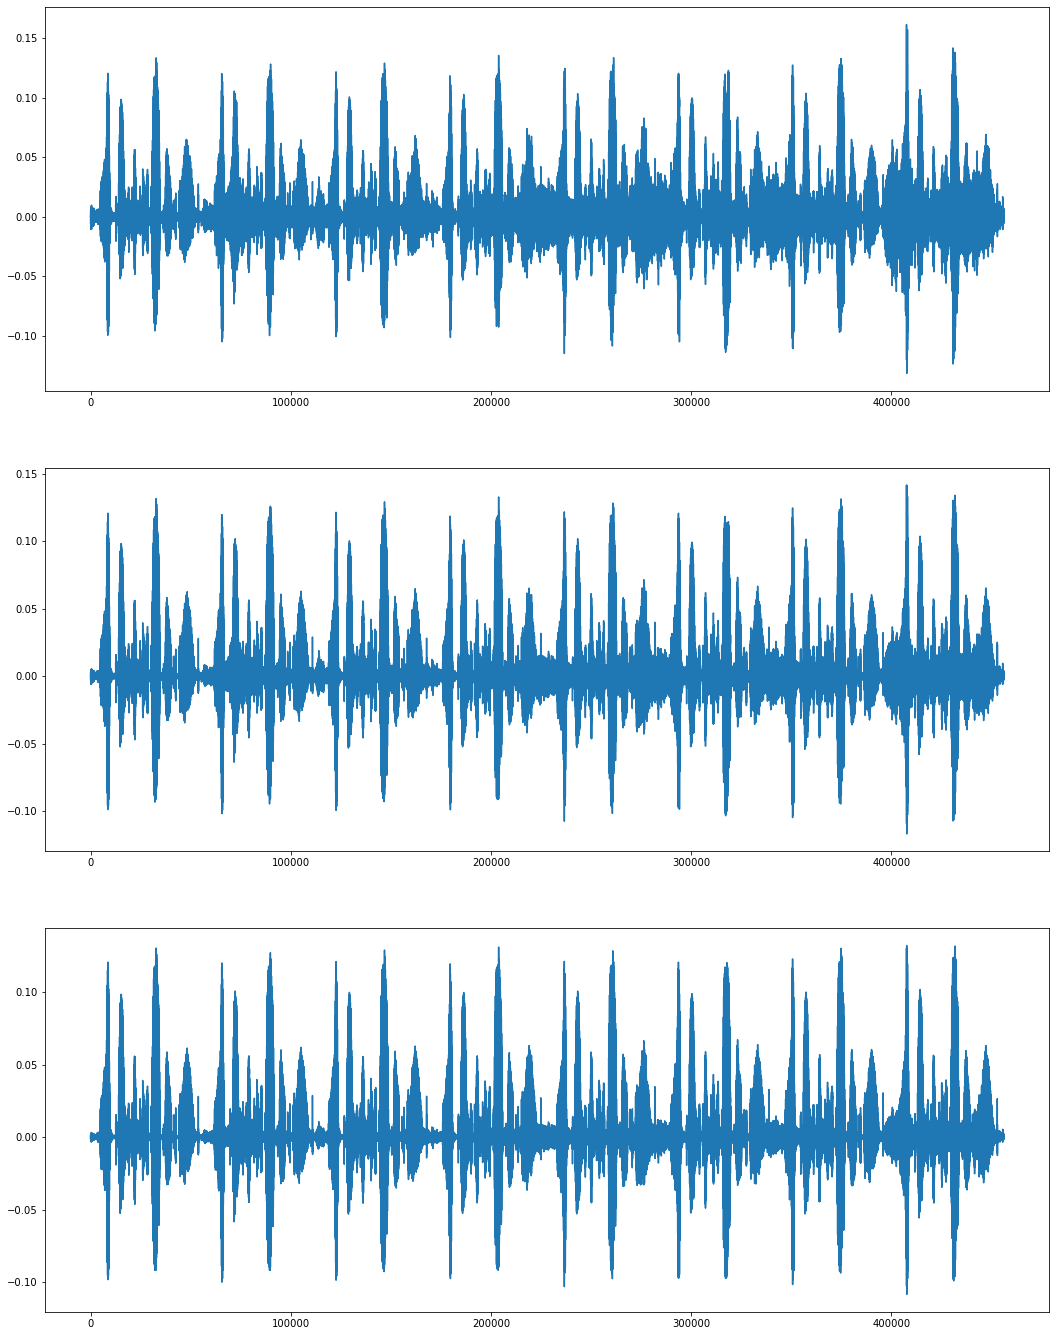

In [7]:
plt.figure(figsize=(18,24))
plt.subplot(3, 1, 1)
plt.plot(speech_noise_1)

plt.subplot(3, 1, 2)
plt.plot(speech_noise_2)

plt.subplot(3, 1, 3)
plt.plot(speech_noise_3)
plt.show()

## Load Dataset Directories

In [13]:
# Structure
# ├── Dataset
# │         ├── Noise
# │         │         ├── Kindergarten_Noise.wav
# │         │         └── TrainStation_Noise.wav
# │         └── Speech
# │             ├── Female_Speech.WAV
# │             └── Male_Speech.WAV
# └── Noise Added Dataset
#     ├── 0dB
#     ├── -10dB
#     ├── 10dB
#     ├── -5dB
#     └── 5dB

# import
import os

database_path = "Dataset Structure/"
dirpath = []
dirnames = []
filenames = []

for i, j, k in os.walk(database_path):
    dirpath.append(i)
    dirnames.append(j)
    filenames.append(k)

print(dirpath)
print(dirnames)
print(filenames)



['Dataset Structure/', 'Dataset Structure/Noise Added Dataset', 'Dataset Structure/Noise Added Dataset/5dB', 'Dataset Structure/Noise Added Dataset/-5dB', 'Dataset Structure/Noise Added Dataset/10dB', 'Dataset Structure/Noise Added Dataset/-10dB', 'Dataset Structure/Noise Added Dataset/0dB', 'Dataset Structure/Dataset', 'Dataset Structure/Dataset/Noise', 'Dataset Structure/Dataset/Speech']
[['Noise Added Dataset', 'Dataset'], ['5dB', '-5dB', '10dB', '-10dB', '0dB'], [], [], [], [], [], ['Noise', 'Speech'], [], []]
[[], [], [], [], [], [], [], [], ['Kindergarten_Noise.wav', 'TrainStation_Noise.wav'], ['Female_Speech.WAV', 'Male_Speech.WAV']]


## Save Noise Dataset